In [1]:
import pygmt

# Load sample earth relief data
#grid = pygmt.datasets.load_earth_relief(resolution="10m", region=[-109, -102, 30, 41])

In [ ]:
fig = pygmt.Figure()
fig.grdview(grid='@earth_relief_30s', 
            region=[-109, -102, 36, 41],
           perspective=[130, 30],frame=["xa", "ya", "WSnE"],
           projection="M15c",zsize="1.5c",)

fig.show()

grdview [WARNING]: Your grid y's or latitudes appear to be outside the map region and will be skipped.


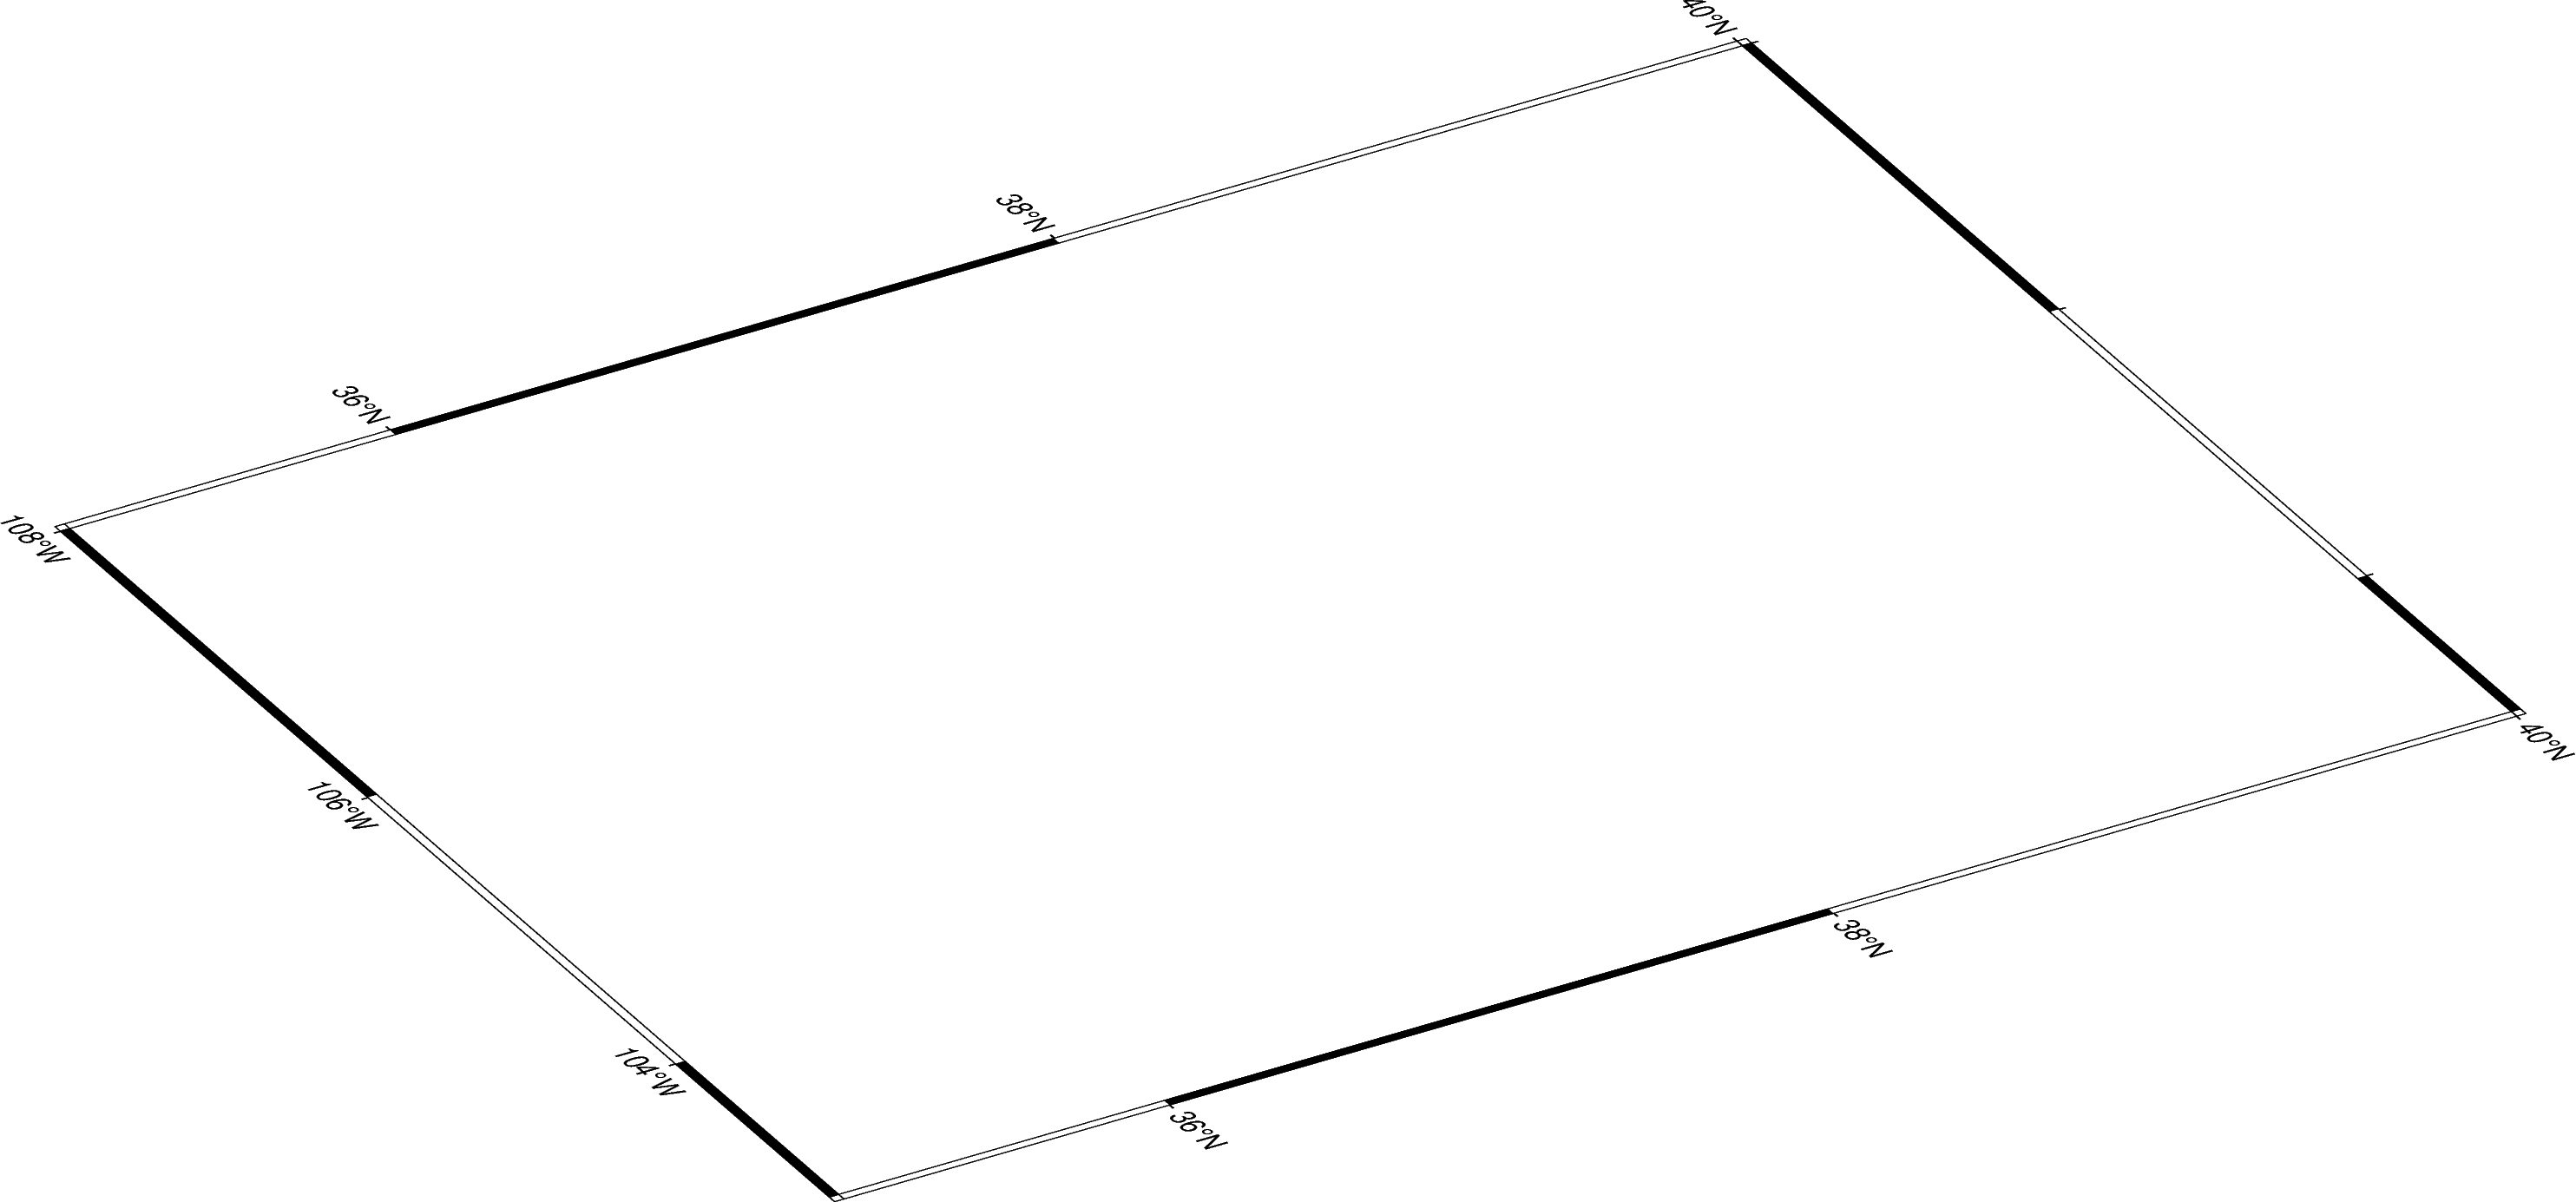

In [20]:
fig = pygmt.Figure()
fig.grdview(
    grid=grid,
    # Sets the view azimuth as 130 degrees, and the view elevation as 30
    # degrees
    perspective=[120, 30],
    # Sets the x- and y-axis labels, and annotates the west, south, and east
    # axes
    frame=["xa", "ya", "WSnE"],
    # Sets a Mercator projection on a 15-centimeter figure
    projection="M15c",
    # Sets the height of the three-dimensional relief at 1.5 centimeters
    zsize="1.5c",
)
fig.show()

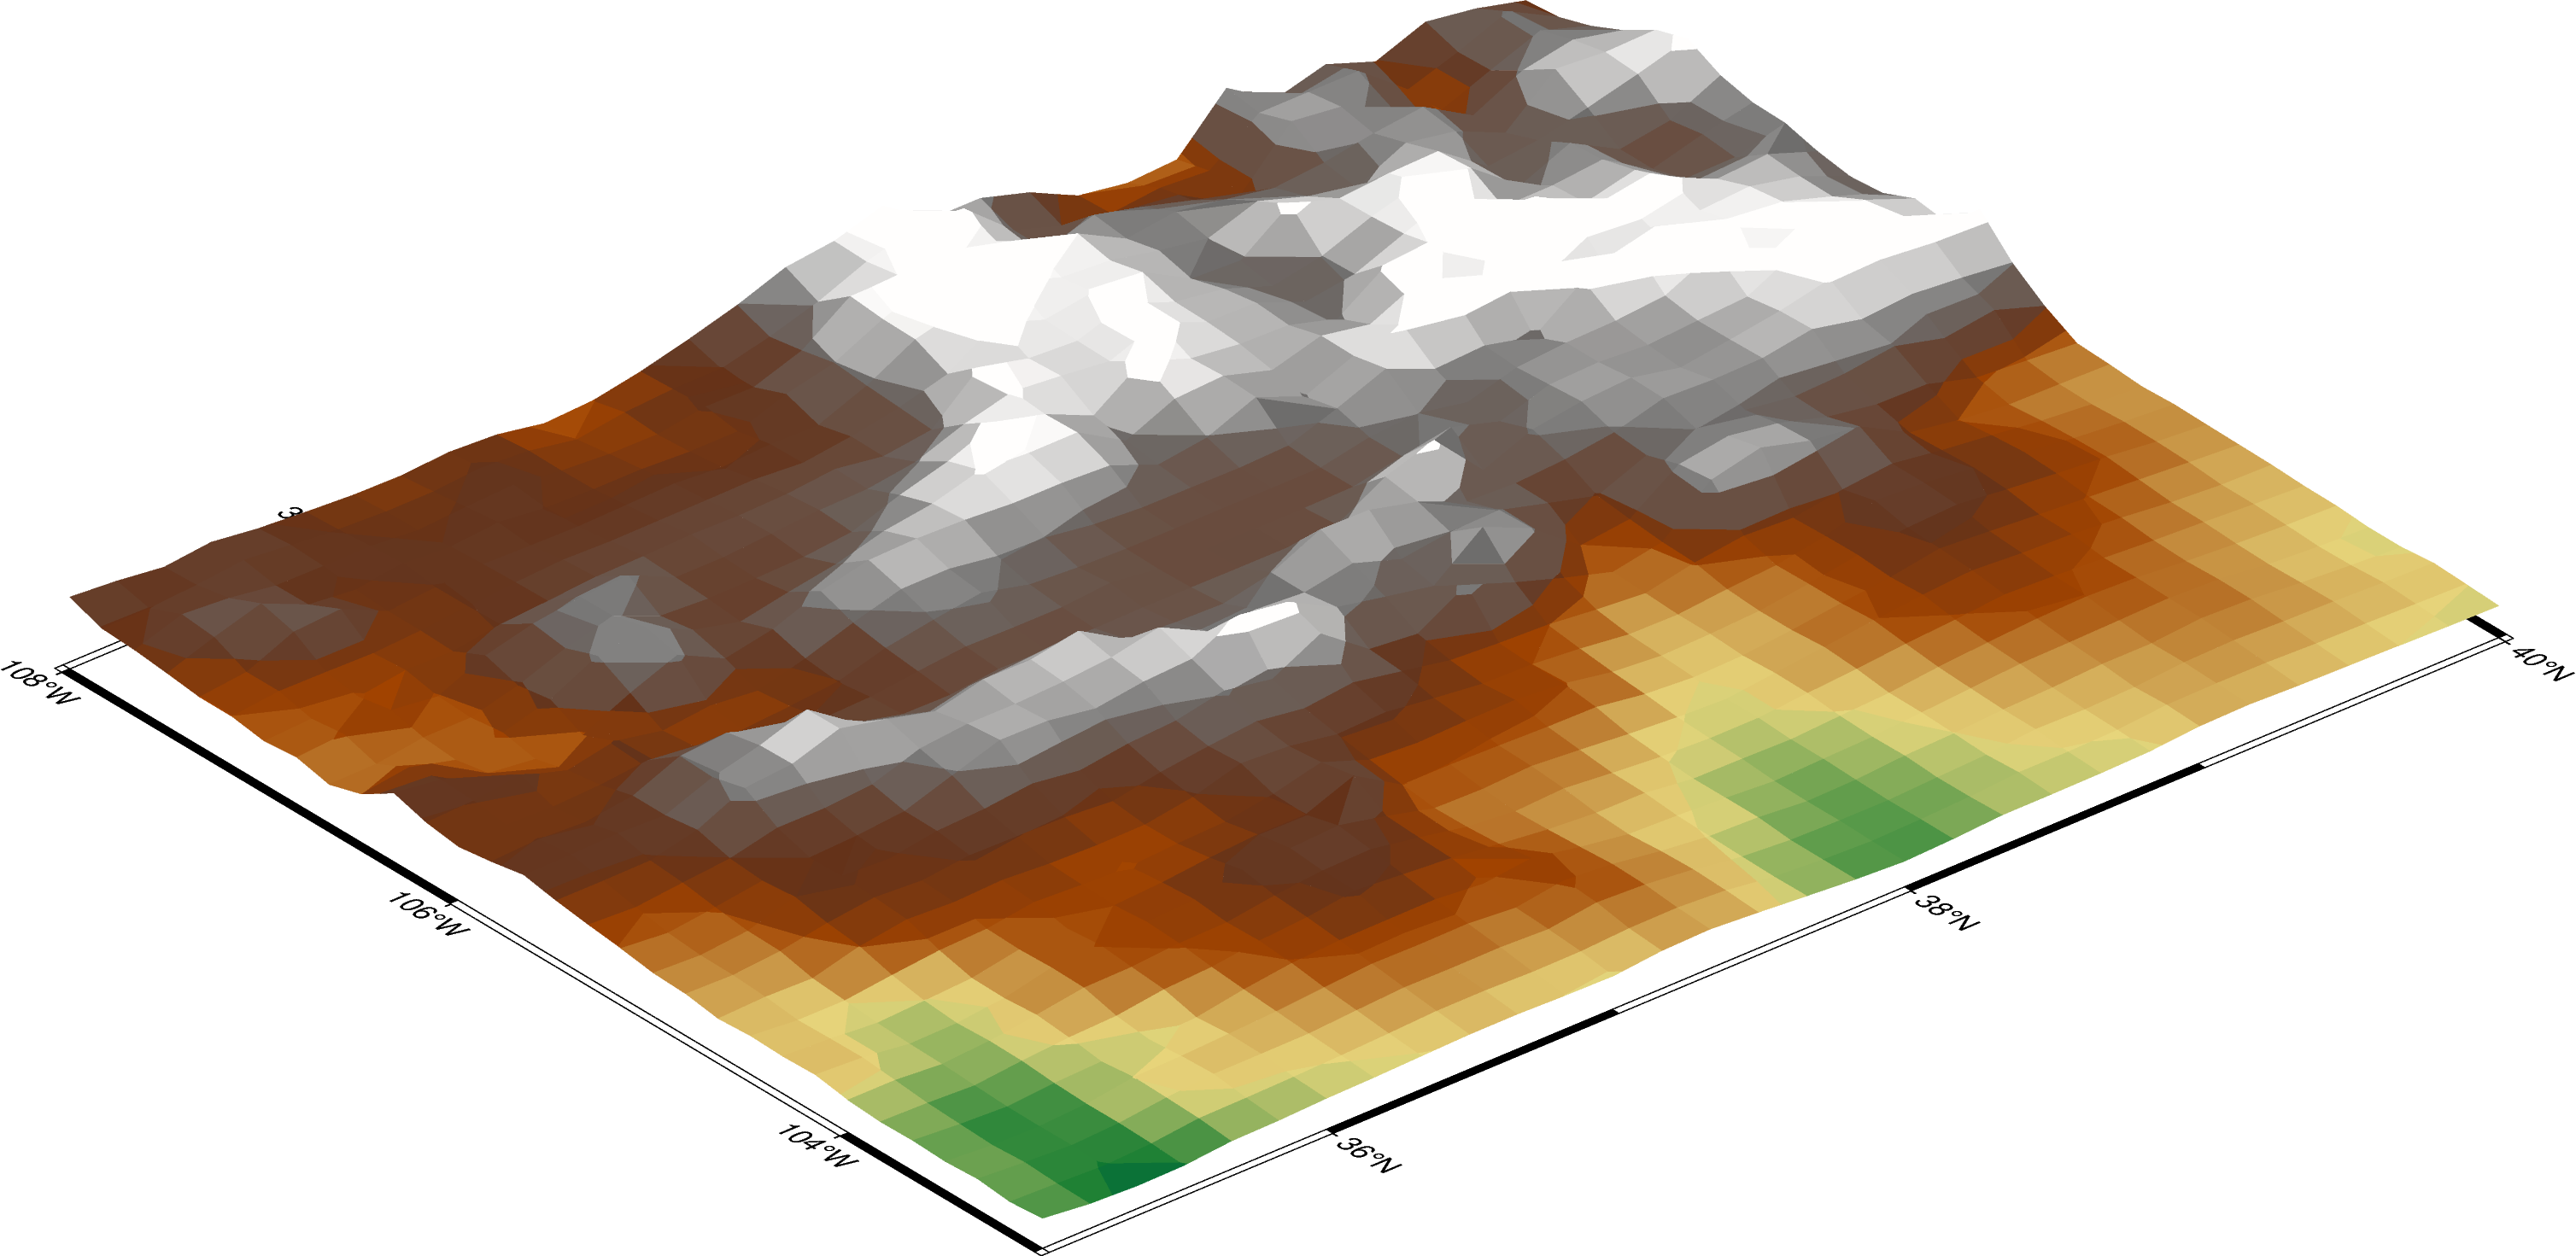

In [16]:
fig = pygmt.Figure()
fig.grdview(
    grid=grid,
    perspective=[130, 30],
    frame=["xa", "yaf", "WSnE"],
    projection="M15c",
    zsize="1.5c",
    # Set the surftype to "surface"
    surftype="s",
    # Set the CPT to "geo"
    cmap="geo",
)
fig.show()

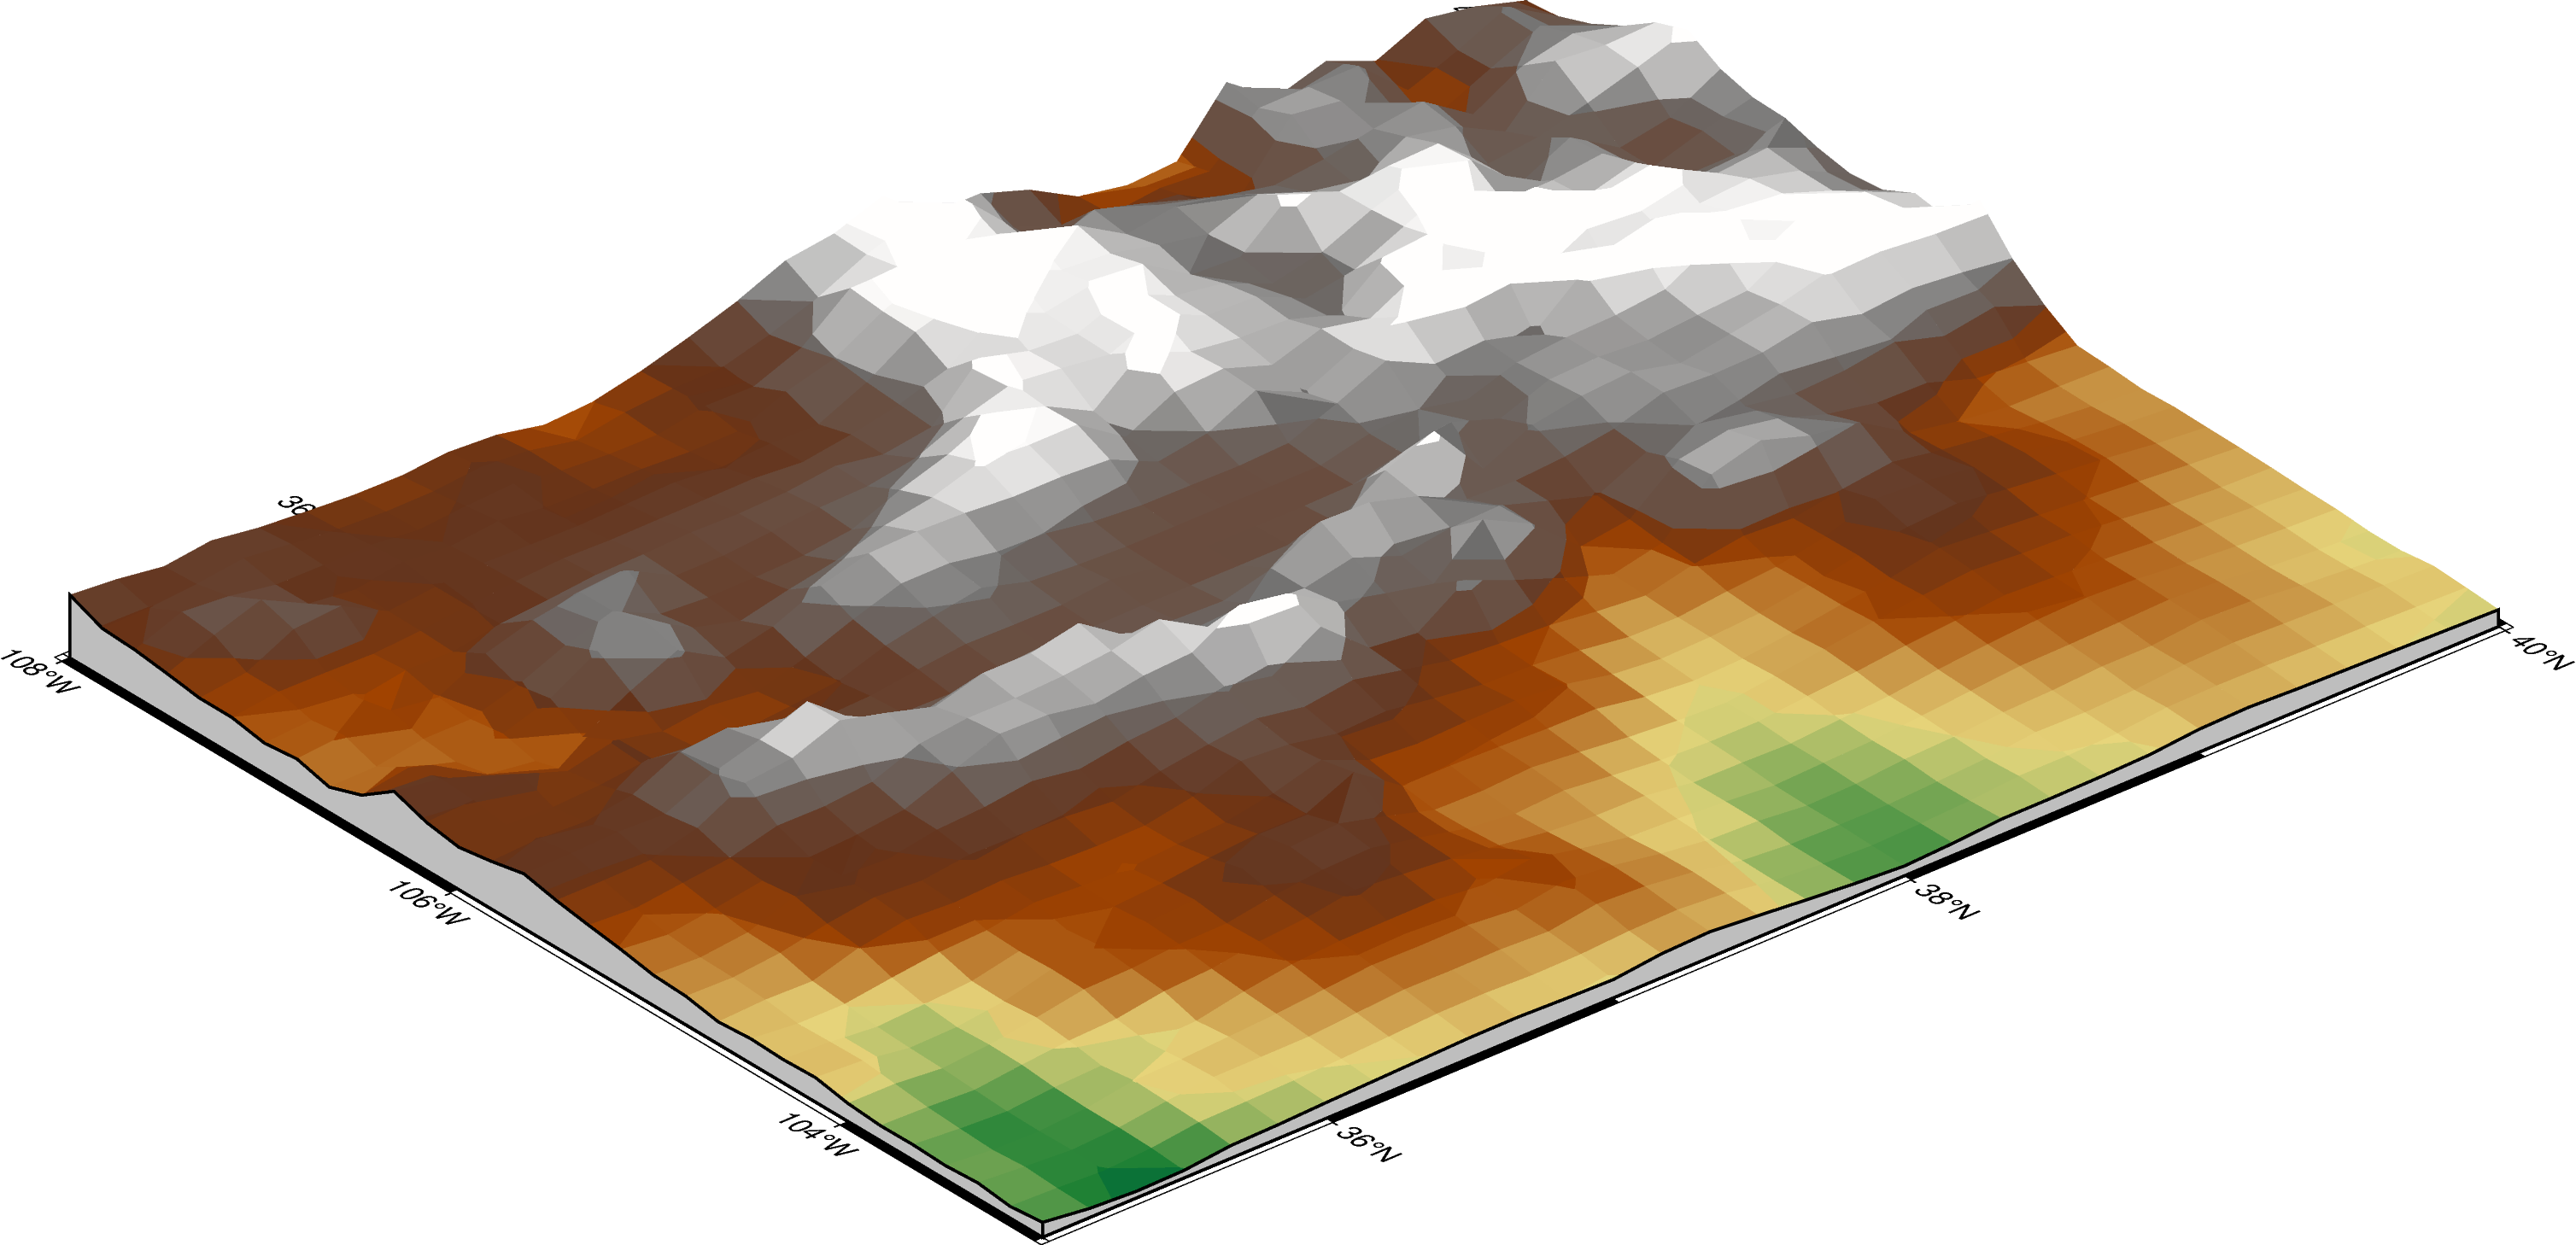

In [5]:
fig = pygmt.Figure()
fig.grdview(
    grid=grid,
    perspective=[130, 30],
    frame=["xa", "yaf", "WSnE"],
    projection="M15c",
    zsize="1.5c",
    surftype="s",
    cmap="geo",
    # Set the plane elevation to 1,000 meters and make the fill "gray"
    plane="1000+ggray",
)
fig.show()

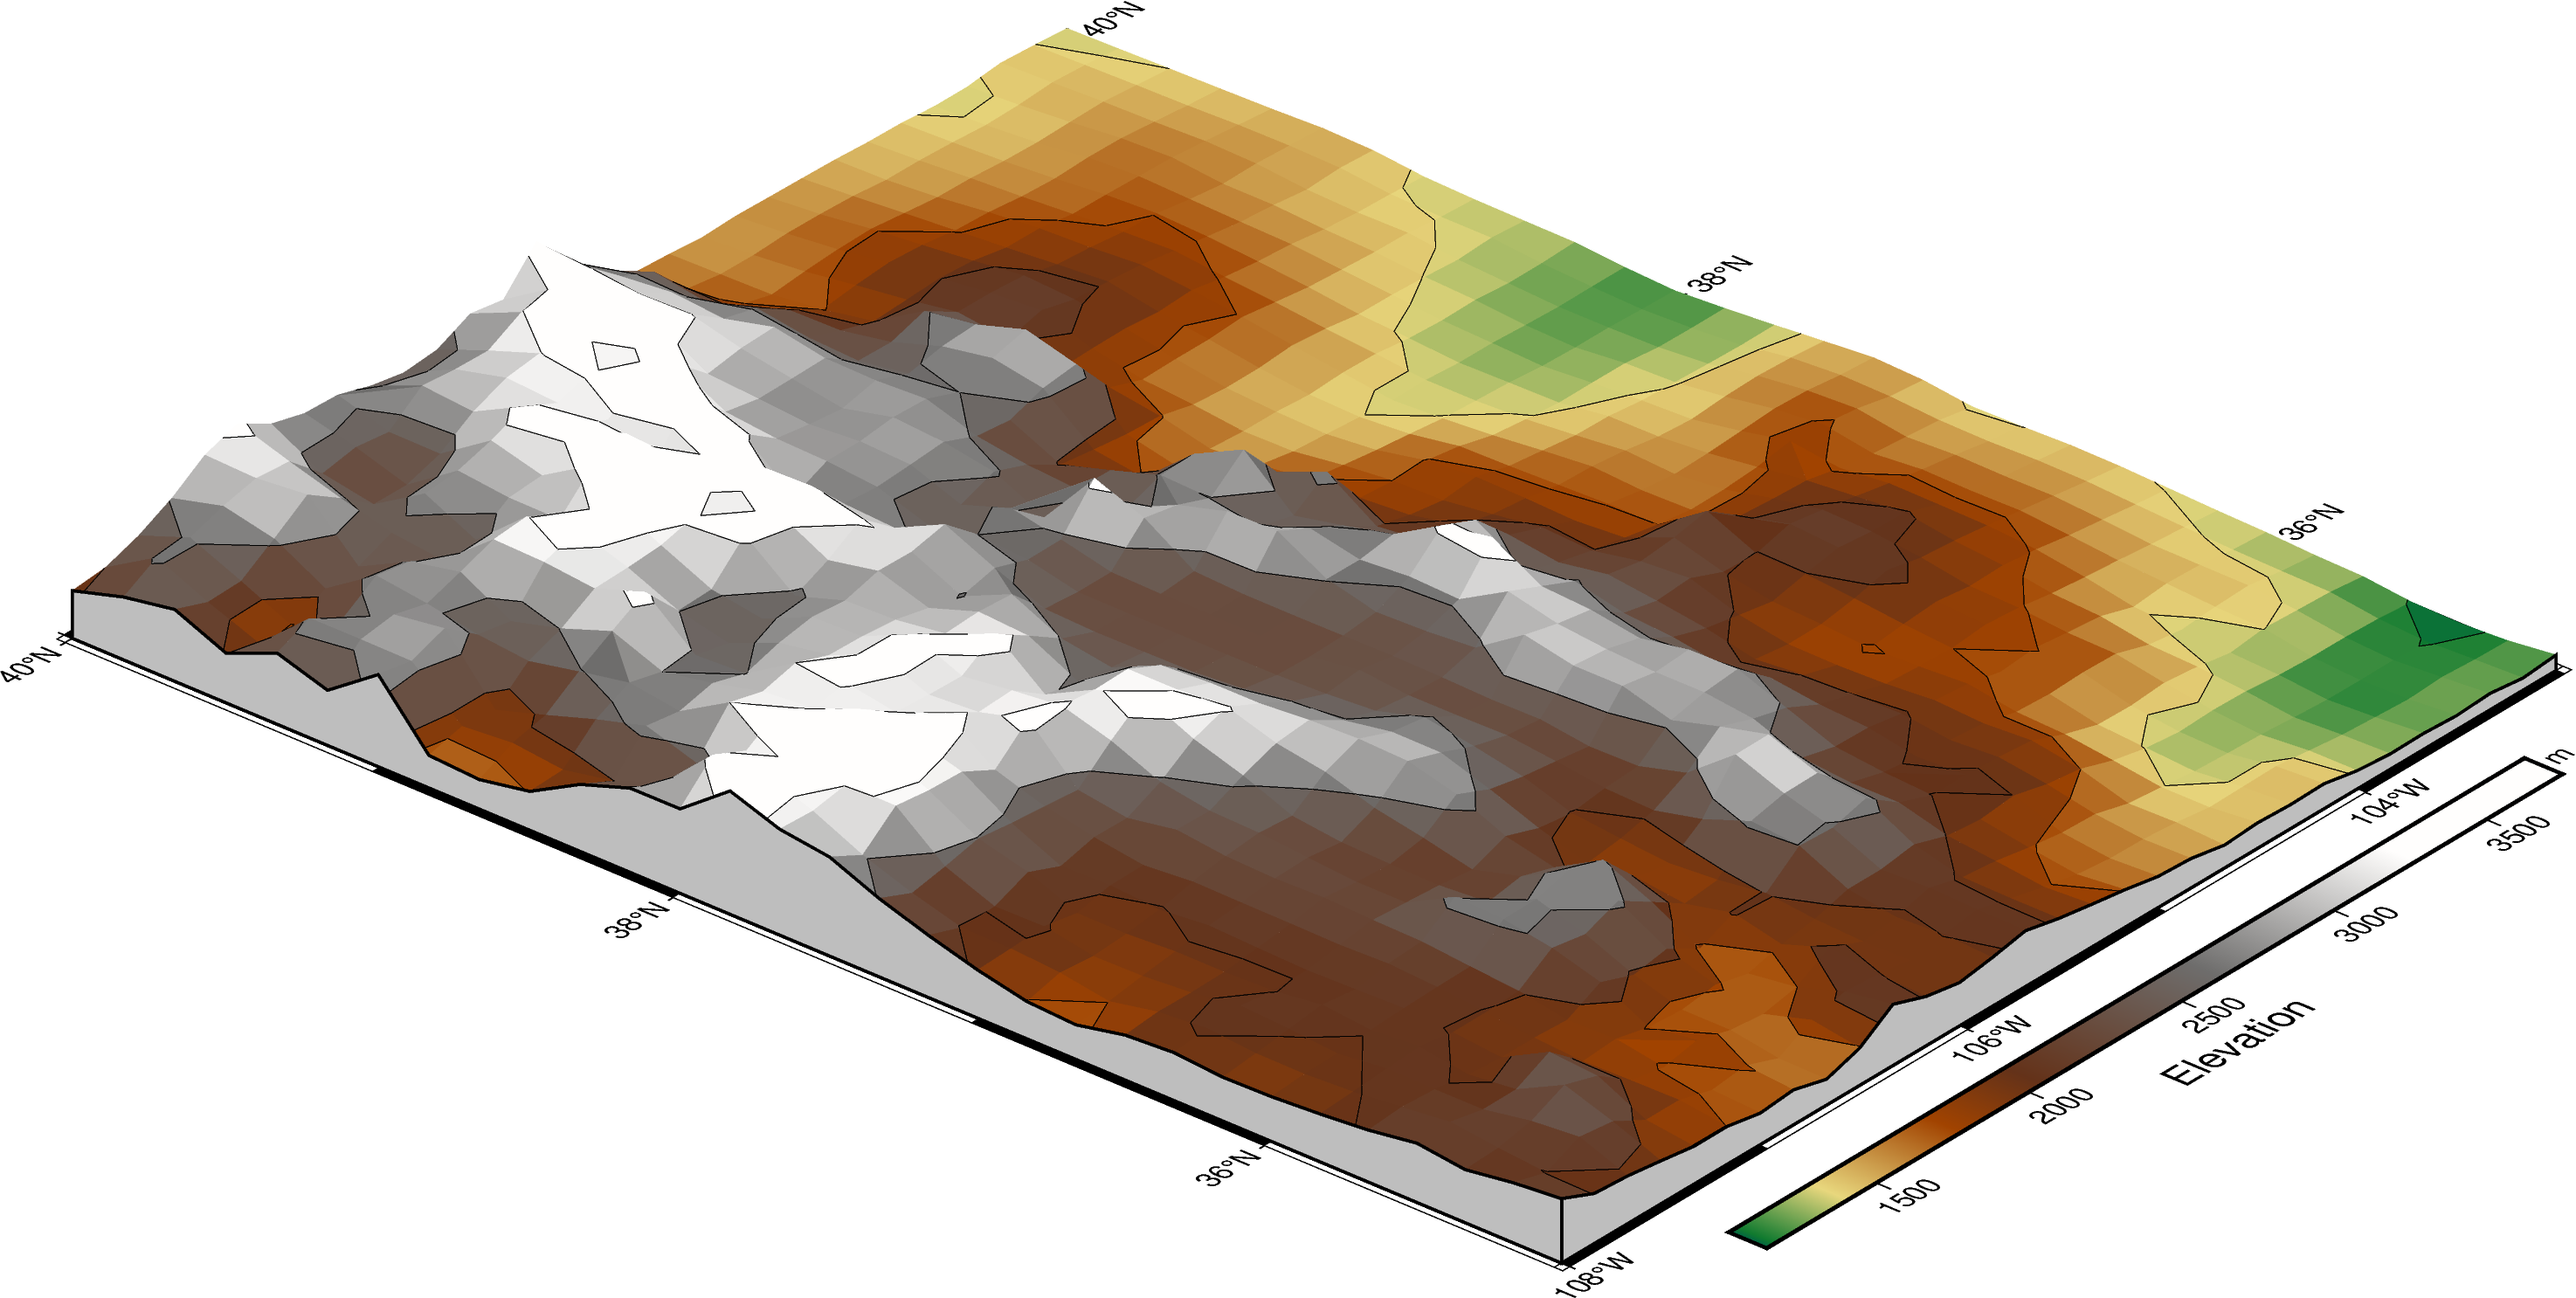

In [6]:
fig = pygmt.Figure()
fig.grdview(
    grid=grid,
    # Set the azimuth to -130 (230) degrees and the elevation to 30 degrees
    perspective=[-130, 30],
    frame=["xaf", "yaf", "WSnE"],
    projection="M15c",
    zsize="1.5c",
    surftype="s",
    cmap="geo",
    plane="1000+ggrey",
    # Set the contour pen thickness to "0.1p"
    contourpen="0.1p",
)
fig.colorbar(perspective=True, frame=["a500", "x+lElevation", "y+lm"])
fig.show()

In [7]:
import pydeck as pdk
import os

# Import Mapbox API Key from environment
MAPBOX_API_KEY = 'sk.eyJ1IjoibnVya2FybGlkYWc5MyIsImEiOiJjbGluOGZtNm0wdnNyM3Fwa3BvMDBvb2c0In0.PAXTx-M3mD_5IdSduukIgQ'

# AWS Open Data Terrain Tiles
TERRAIN_IMAGE = "https://s3.amazonaws.com/elevation-tiles-prod/terrarium/{z}/{x}/{y}.png"

# Define how to parse elevation tiles
ELEVATION_DECODER = {"rScaler": 256, "gScaler": 1, "bScaler": 1 / 256, "offset": -32768}

SURFACE_IMAGE = f"https://api.mapbox.com/v4/mapbox.satellite/{{z}}/{{x}}/{{y}}@2x.png?access_token={MAPBOX_API_KEY}"

terrain_layer = pdk.Layer(
    "TerrainLayer", elevation_decoder=ELEVATION_DECODER, texture=SURFACE_IMAGE, elevation_data=TERRAIN_IMAGE
)

view_state = pdk.ViewState(latitude=39.24, longitude=-104.18, zoom=11.5, bearing=10, pitch=60)

r = pdk.Deck(terrain_layer, initial_view_state=view_state)

r.to_html("terrain_layer.html")